# Library installation and importing

In [1]:
!pip install scikeras scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install scikeras
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install --upgrade scikit-learn scikeras

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import math
from pickle import dump, load

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam as Adam_new
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.layers import Flatten, Input

from scikeras.wrappers import KerasRegressor

from statsmodels.tsa.arima.model import ARIMA

import warnings

# Data preprocessing

In [6]:
# Reading CO2 Emissions data
co2Data = pd.read_csv('CO2Data.csv')

# Reading Greenhouse Gases data
ggData = pd.read_csv('GreenhouseGasses.csv')

# Reading Ocean-land Surface Temperature Change data
tempData = pd.read_csv('TempData.csv')

In [7]:
# Displaying CO2 data
co2Data.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [8]:
# Displaying CO2 data
co2Data.tail()

,year,mean,unc
59,2018,408.72,0.12
60,2019,411.66,0.12
61,2020,414.24,0.12
62,2021,416.45,0.12
63,2022,418.56,0.12


In [9]:
# Displaying Greenhouse Gases data
ggData.head()

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **
0,1979,1.027,0.406,0.104,0.154,0.008,0.001,1.700,382,0.785,NaN
1,1980,1.060,0.413,0.104,0.163,0.009,0.001,1.749,386,0.808,2.3
2,1981,1.079,0.420,0.107,0.172,0.009,0.001,1.788,388,0.825,1.8
3,1982,1.091,0.426,0.111,0.180,0.010,0.001,1.819,391,0.840,1.5
4,1983,1.117,0.429,0.113,0.190,0.011,0.001,1.861,394,0.859,1.9


In [10]:
# Displaying Greenhouse Gases data
ggData.tail()

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **
40,2019,2.079,0.516,0.202,0.250,0.057,0.039,3.144,500,1.452,1.8
41,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8
42,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8
43,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8
44,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8


In [11]:
# Displaying Surface temperature change data
tempData.head()

,Year,Value
0,1850,-0.22
1,1851,-0.19
2,1852,-0.38
3,1853,-0.18
4,1854,-0.22


In [12]:
# Displaying Surface temperature change data
tempData.tail()

,Year,Value
169,2019,1.05
170,2020,1.11
171,2021,0.79
172,2022,0.90
173,2023,1.00


In [13]:
co2Data.describe()

,year,mean,unc
count,64.000000,64.000000,6.400000e+01
mean,1990.500000,358.295156,1.200000e-01
std,18.618987,30.583707,9.791247e-17
min,1959.000000,315.980000,1.200000e-01
25%,1974.750000,330.895000,1.200000e-01
50%,1990.500000,355.075000,1.200000e-01
75%,2006.250000,382.572500,1.200000e-01
max,2022.000000,418.560000,1.200000e-01


In [14]:
ggData.describe()

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,44.000000
mean,2000.911111,1.570311,0.475667,0.154622,0.251378,0.034044,0.014711,2.500689,445.244444,1.154733,1.677273
std,12.990945,0.343749,0.030469,0.032262,0.034604,0.017099,0.014129,0.452937,37.559744,0.209166,0.377177
min,1979.000000,1.027000,0.406000,0.104000,0.154000,0.008000,0.001000,1.700000,382.000000,0.785000,0.700000
25%,1990.000000,1.294000,0.459000,0.129000,0.246000,0.018000,0.003000,2.166000,417.000000,1.000000,1.500000
50%,2001.000000,1.538000,0.481000,0.153000,0.263000,0.034000,0.009000,2.494000,443.000000,1.152000,1.700000
75%,2012.000000,1.848000,0.494000,0.181000,0.276000,0.051000,0.025000,2.860000,475.000000,1.321000,1.825000
max,2021.000000,2.140000,0.526000,0.210000,0.282000,0.058000,0.044000,3.222000,508.000000,1.488000,2.700000


In [15]:
tempData.describe()

,Year,Value
count,174.000000,174.000000
mean,1936.500000,0.050115
std,50.373604,0.374245
min,1850.000000,-0.590000
25%,1893.250000,-0.210000
50%,1936.500000,-0.070000
75%,1979.750000,0.237500
max,2023.000000,1.140000


In [16]:
# Checking for missing values in each dataset
co2_missing_values = co2Data.isnull().sum()
gg_missing_values = ggData.isnull().sum()
temp_missing_values = tempData.isnull().sum()

# Printing the number of missing values in each dataset
print("CO2 Emissions - Missing Values:")
print(co2_missing_values)

print("\nGreenhouse Gases - Missing Values:")
print(gg_missing_values)

print("\nSurface Temperature Change - Missing Values:")
print(temp_missing_values)

CO2 Emissions - Missing Values:
year    0
mean    0
unc     0
dtype: int64

Greenhouse Gases - Missing Values:
Year         0
CO2          0
CH4          0
N2O          0
CFC*         0
HCFCs        0
HFCs*        0
Total        0
Total.1      0
1990 = 1     0
change **    1
dtype: int64

Surface Temperature Change - Missing Values:
Year     0
Value    0
dtype: int64


In [17]:
#Filling in missing values in each dataset with the mean of each respective column
co2Data = co2Data.fillna(co2Data.mean())
ggData = ggData.fillna(ggData.mean())
tempData = tempData.fillna(tempData.mean())

In [18]:
# renaming
co2Data.rename(columns={'year': 'Year'}, inplace=True)

# filtering dataframes to include data from 1980 to 2021 only
ggData = ggData[(ggData['Year'] >= 1980) & (ggData['Year'] <= 2021)]
tempData = tempData[(tempData['Year'] >= 1980) & (tempData['Year'] <= 2021)]
co2Data = co2Data[(co2Data['Year'] >= 1980) & (co2Data['Year'] <= 2021)]

# merging the dataframes
df = pd.merge(ggData, tempData, on='Year')
df = pd.merge(df, co2Data, on='Year')

In [19]:
#Displaying the new merged dataframe
df.head()

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **,Value,mean,unc
0,1980,1.060,0.413,0.104,0.163,0.009,0.001,1.749,386,0.808,2.3,0.33,338.76,0.12
1,1981,1.079,0.420,0.107,0.172,0.009,0.001,1.788,388,0.825,1.8,0.38,340.12,0.12
2,1982,1.091,0.426,0.111,0.180,0.010,0.001,1.819,391,0.840,1.5,0.22,341.48,0.12
3,1983,1.117,0.429,0.113,0.190,0.011,0.001,1.861,394,0.859,1.9,0.25,343.15,0.12
4,1984,1.141,0.432,0.116,0.198,0.012,0.002,1.901,397,0.878,1.9,0.13,344.87,0.12


In [20]:
#Displayimg the new merged dataframe
df.tail()

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **,Value,mean,unc
39,2019,2.079,0.516,0.202,0.250,0.057,0.039,3.144,500,1.452,1.8,1.05,411.66,0.12
40,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8,1.11,414.24,0.12
41,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8,0.79,416.45,0.12
42,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8,1.11,414.24,0.12
43,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8,0.79,416.45,0.12


In [21]:
#Dropping duplicate columns
df.drop_duplicates(subset='Year', inplace=True)
df.reset_index(drop=True, inplace=True)

In [22]:
df.tail()

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **,Value,mean,unc
37,2017,2.016,0.509,0.195,0.254,0.056,0.035,3.065,493,1.415,1.6,0.97,406.76,0.12
38,2018,2.047,0.512,0.199,0.253,0.057,0.037,3.104,497,1.433,1.8,0.90,408.72,0.12
39,2019,2.079,0.516,0.202,0.250,0.057,0.039,3.144,500,1.452,1.8,1.05,411.66,0.12
40,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8,1.11,414.24,0.12
41,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8,0.79,416.45,0.12


In [23]:
# Defining a dictionary with old column names as keys and new column names as values
rename_dict = {
    'Year': 'Year',
    'CO2': 'CO2',
    'CH4': 'Methane',
    'N2O': 'Nitrous_Oxide',
    'CFC*': 'CFCs',
    'HCFCs': 'Hydrochlorofluorocarbons',
    'HFCs*': 'Hydrofluorocarbons',
    'Total': 'Total_Greenhouse_Gases',
    'Total.1': 'Total_Greenhouse_Gases_Scaled',
    '1990 = 1': '1990_Equals_1',
    'change **': 'Change',
    'Value': 'Surface_Temperature',
    'mean': 'CO2_Mean',
    'unc': 'CO2_Uncertainty'
}

# Renaming the columns
df.rename(columns=rename_dict, inplace=True)
df = df.drop(columns=['CO2_Uncertainty'])

In [24]:
df.describe()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases,Total_Greenhouse_Gases_Scaled,1990_Equals_1,Change,Surface_Temperature,CO2_Mean
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,2000.500000,1.556810,0.475071,0.153286,0.253905,0.033548,0.013714,2.486333,443.857143,1.148095,1.671429,0.570000,373.450000
std,12.267844,0.323074,0.027710,0.030224,0.032346,0.016435,0.013071,0.424583,35.130816,0.196060,0.385269,0.261786,23.007104
min,1980.000000,1.060000,0.413000,0.104000,0.163000,0.009000,0.001000,1.749000,386.000000,0.808000,0.700000,0.120000,338.760000
25%,1990.250000,1.299000,0.460000,0.129500,0.248500,0.018500,0.003000,2.174750,417.500000,1.004000,1.500000,0.372500,354.762500
50%,2000.500000,1.526500,0.481000,0.152000,0.263500,0.033000,0.008500,2.481000,442.000000,1.146000,1.650000,0.565000,370.515000
75%,2010.750000,1.813500,0.491750,0.177000,0.277500,0.049500,0.022500,2.819000,471.250000,1.301250,1.875000,0.737500,391.412500
max,2021.000000,2.140000,0.526000,0.210000,0.282000,0.058000,0.044000,3.222000,508.000000,1.488000,2.700000,1.140000,416.450000


In [25]:
#Checking for missing values
df.isnull().sum()

Year                             0
CO2                              0
Methane                          0
Nitrous_Oxide                    0
CFCs                             0
Hydrochlorofluorocarbons         0
Hydrofluorocarbons               0
Total_Greenhouse_Gases           0
Total_Greenhouse_Gases_Scaled    0
1990_Equals_1                    0
Change                           0
Surface_Temperature              0
CO2_Mean                         0
dtype: int64

In [26]:
#Saving the new edited dataframe to a new csv file
df.to_csv('C:/Users/Sumana Sarkar/OneDrive/Documents/Final year project/clean_data.csv',index=False)

In [27]:
df_list = df.values.tolist()
df_list.insert(0, list(df.columns))

In [28]:
df.head()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases,Total_Greenhouse_Gases_Scaled,1990_Equals_1,Change,Surface_Temperature,CO2_Mean
0,1980,1.060,0.413,0.104,0.163,0.009,0.001,1.749,386,0.808,2.3,0.33,338.76
1,1981,1.079,0.420,0.107,0.172,0.009,0.001,1.788,388,0.825,1.8,0.38,340.12
2,1982,1.091,0.426,0.111,0.180,0.010,0.001,1.819,391,0.840,1.5,0.22,341.48
3,1983,1.117,0.429,0.113,0.190,0.011,0.001,1.861,394,0.859,1.9,0.25,343.15
4,1984,1.141,0.432,0.116,0.198,0.012,0.002,1.901,397,0.878,1.9,0.13,344.87


In [29]:
df.tail()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases,Total_Greenhouse_Gases_Scaled,1990_Equals_1,Change,Surface_Temperature,CO2_Mean
37,2017,2.016,0.509,0.195,0.254,0.056,0.035,3.065,493,1.415,1.6,0.97,406.76
38,2018,2.047,0.512,0.199,0.253,0.057,0.037,3.104,497,1.433,1.8,0.90,408.72
39,2019,2.079,0.516,0.202,0.250,0.057,0.039,3.144,500,1.452,1.8,1.05,411.66
40,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8,1.11,414.24
41,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8,0.79,416.45


In [30]:
# Making a copy of the dataframe and storing it in a new variable
data=df.copy()

In [31]:
data.head()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases,Total_Greenhouse_Gases_Scaled,1990_Equals_1,Change,Surface_Temperature,CO2_Mean
0,1980,1.060,0.413,0.104,0.163,0.009,0.001,1.749,386,0.808,2.3,0.33,338.76
1,1981,1.079,0.420,0.107,0.172,0.009,0.001,1.788,388,0.825,1.8,0.38,340.12
2,1982,1.091,0.426,0.111,0.180,0.010,0.001,1.819,391,0.840,1.5,0.22,341.48
3,1983,1.117,0.429,0.113,0.190,0.011,0.001,1.861,394,0.859,1.9,0.25,343.15
4,1984,1.141,0.432,0.116,0.198,0.012,0.002,1.901,397,0.878,1.9,0.13,344.87


In [32]:
df.tail()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases,Total_Greenhouse_Gases_Scaled,1990_Equals_1,Change,Surface_Temperature,CO2_Mean
37,2017,2.016,0.509,0.195,0.254,0.056,0.035,3.065,493,1.415,1.6,0.97,406.76
38,2018,2.047,0.512,0.199,0.253,0.057,0.037,3.104,497,1.433,1.8,0.90,408.72
39,2019,2.079,0.516,0.202,0.250,0.057,0.039,3.144,500,1.452,1.8,1.05,411.66
40,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8,1.11,414.24
41,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8,0.79,416.45


# Data Visualization

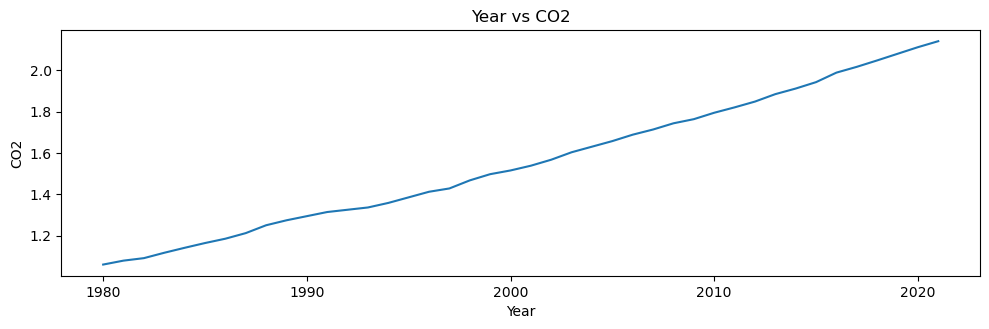

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Year vs. CO2
plt.subplot(2, 1, 1)
plt.plot(data['Year'], data['CO2'])
plt.title('Year vs CO2')
plt.xlabel('Year')
plt.ylabel('CO2')

plt.tight_layout()
plt.show()

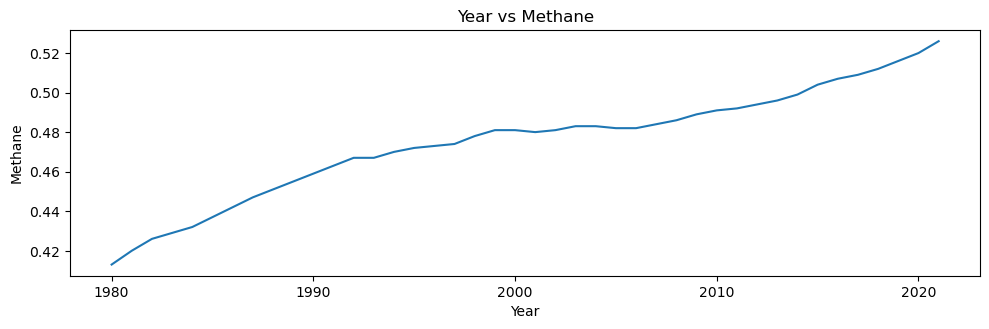

In [34]:
plt.figure(figsize=(10, 6))

# Year vs. Methane
plt.subplot(2, 1, 2)
plt.plot(data['Year'], data['Methane'])
plt.title('Year vs Methane')
plt.xlabel('Year')
plt.ylabel('Methane')

plt.tight_layout()
plt.show()

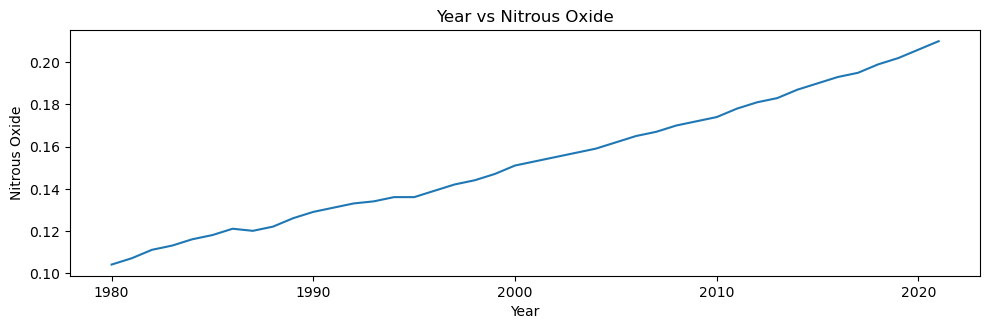

In [35]:
plt.figure(figsize=(10, 6))

# Year vs. Nitrous Oxide
plt.subplot(2, 1, 1)
plt.plot(data['Year'], data['Nitrous_Oxide'])
plt.title('Year vs Nitrous Oxide')
plt.xlabel('Year')
plt.ylabel('Nitrous Oxide')

plt.tight_layout()
plt.show()

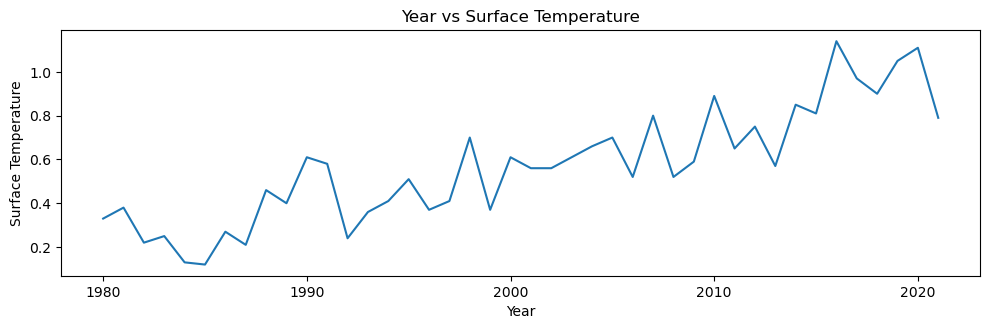

In [36]:
plt.figure(figsize=(10, 6))

# Year vs. Surface Temperature
plt.subplot(2, 1, 2)
plt.plot(data['Year'], data['Surface_Temperature'])
plt.title('Year vs Surface Temperature')
plt.xlabel('Year')
plt.ylabel('Surface Temperature')

plt.tight_layout()
plt.show()

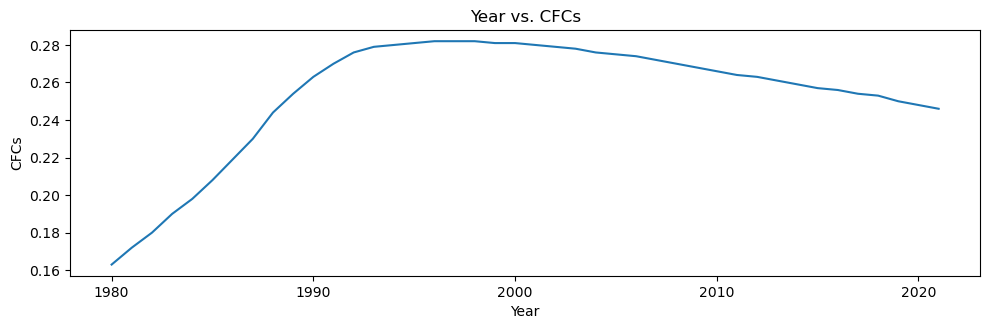

In [37]:
plt.figure(figsize=(10, 6))

# Year vs CFCs
plt.subplot(2, 1, 1)
plt.plot(data['Year'], data['CFCs'])
plt.title('Year vs. CFCs')
plt.xlabel('Year')
plt.ylabel('CFCs')

plt.tight_layout()
plt.show()

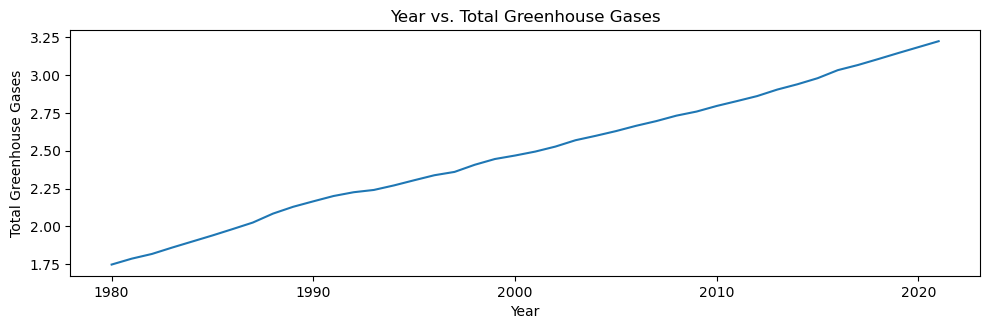

In [38]:
plt.figure(figsize=(10, 6))

# Year vs Total Greenhouse Gases
plt.subplot(2, 1, 2)
plt.plot(data['Year'], data['Total_Greenhouse_Gases'])
plt.title('Year vs. Total Greenhouse Gases')
plt.xlabel('Year')
plt.ylabel('Total Greenhouse Gases')

plt.tight_layout()
plt.show()

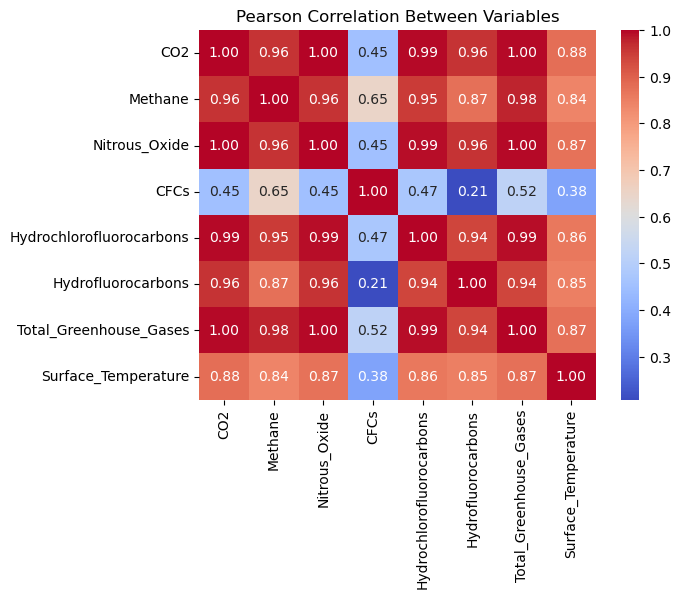

In [39]:
# Choosing the variables for correlation analysis
correlation_variables = ['CO2', 'Methane', 'Nitrous_Oxide', 'CFCs', 'Hydrochlorofluorocarbons', 'Hydrofluorocarbons', 'Total_Greenhouse_Gases', 'Surface_Temperature']

# Finding out the correlation matrix using Pearson correlation coefficient
correlation_matrix = data[correlation_variables].corr(method='pearson')

# Creating a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Between Variables')
plt.show()

# Data Modeling

In [40]:
class ModelNN:

    def __init__(self, model, data, scaler, target_variables, is_tf_model=True):
        self.model = model
        self.data = data
        self.scaler = scaler
        self.is_tf_model = is_tf_model
        self.target_variables = target_variables

    def predict(self, input_year):
        print('input_year', input_year)
        time_steps = 1
        predicted_val = []
        if input_year > 2021:
            # Preparing the input data
            input_data = self.data[self.data['Year'] <= 2021]
            input_data_scaled = self.scaler.transform(input_data[self.target_variables])
            # Preparing the input sequence
            input_sequences = []
            for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
                input_sequences.append(input_data_scaled[i - time_steps:i])

            for year in range(2022, input_year + 1):
                input_sequences_array = np.array([sequence for sequence in input_sequences if len(sequence) == time_steps])
                input_sequence_reshaped = np.reshape(input_sequences_array, (input_sequences_array.shape[0], input_sequences_array.shape[1], len(target_variables)))

                # Making predictions for the input sequence
                if self.is_tf_model:
                    predictions = self.model.predict(input_sequence_reshaped[-1].reshape(1, time_steps, len(self.target_variables)))
                else:
                    predictions = self.model.predict(input_sequence_reshaped[-1].reshape(1, time_steps, len(self.target_variables)).reshape(1, 12))

                # Inverse transforming the predicted values
                prediction = self.scaler.inverse_transform(predictions)

                # To get predicted values for the current year
                predicted_values = prediction[0]

                # Appending the predicted values to the results
                predicted_val.append(predicted_values)

                # Updating the input sequence for the next iteration
                input_sequences[0][:-1] = input_sequences[0][1:]  # Remove the first value
                input_sequences[0][-1] = np.array(predictions)  # Add predictions at the last index
        else:
            input_data = self.data[self.data['Year'] < input_year]
            input_data_scaled = self.scaler.transform(input_data[self.target_variables])
            # Preparimg the input sequence
            input_sequence = []
            for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
                input_sequence.append(input_data_scaled[i - time_steps:i])

            input_sequence = np.array(input_sequence)

            # Reshaping the input sequence for LSTM (input_shape: [samples, time_steps, features])
            if self.is_tf_model:
                input_sequence = np.reshape(input_sequence, (input_sequence.shape[0], input_sequence.shape[1], len(self.target_variables)))
            else:
                input_sequence = input_sequence.reshape(1, 12)

            # Making predictions for the input sequence
            predictions = self.model.predict(input_sequence)

            # Inverse transforing the predicted values
            predicted_val = self.scaler.inverse_transform(predictions)
        return predicted_val[-1]

In [41]:
def convert_watt_per_m2_to_joule_per_year(watt_per_m2):
    total_surface_area_earth_m2 = 5.1 * 10**14
    seconds_per_year = 60 * 60 * 24 * 365
    joules_per_year = watt_per_m2 * total_surface_area_earth_m2 * seconds_per_year
    return joules_per_year

# Data setting

In [42]:
# Extracting the variables for prediction
target_variables = ['CO2', 'Methane', 'Nitrous_Oxide', 'CFCs',
       'Hydrochlorofluorocarbons', 'Hydrofluorocarbons',
       'Total_Greenhouse_Gases', 'Total_Greenhouse_Gases_Scaled',
       '1990_Equals_1', 'Change', 'Surface_Temperature', 'CO2_Mean']

# Normalizing the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[target_variables])

# Defining the number of time steps (lags) to consider
time_steps = 1

# Preparing the training data
train_data = data_scaled[data['Year'] < 2012]
X_train = []
y_train = []
for i in range(time_steps, len(data_scaled)):
    X_train.append(data_scaled[i - time_steps:i])
    y_train.append(data_scaled[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Preparing the test data
test_data = data_scaled[data['Year'] >= 2012]
X_test = []
y_test = []
for i in range(0, len(test_data)):
    val=i+len(train_data)
    X_test.append(data_scaled[val - time_steps:val])
    y_test.append(test_data[i])

X_test = np.array(X_test)
y_test = np.array(y_test)

In [43]:
variables_to_convert = ["CO2", "Methane", "Nitrous_Oxide", "CFCs", "Hydrochlorofluorocarbons", "Hydrofluorocarbons", "Total_Greenhouse_Gases"]

In [44]:
y_test.shape,y_train.shape

((10, 12), (41, 12))

# LSTM (Long Short Term Memory) Model -RNN

C:\Users\Sumana Sarkar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        19,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,492 (80.05 KB)

 Trainable params: 20,492 (80.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - loss: 0.2400 - val_loss: 0.7557
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2358 - val_loss: 0.7342
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2284 - val_loss: 0.7140
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2238 - val_loss: 0.6943
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2234 - val_loss: 0.6745
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2236 - val_loss: 0.6549
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2179 - val_loss: 0.6351
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1874 - val_loss: 0.6150
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1735 - val_loss: 0.5941
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1873 - val_loss: 0.5723
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1834 - val_loss: 0.5499
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1703 - val_l

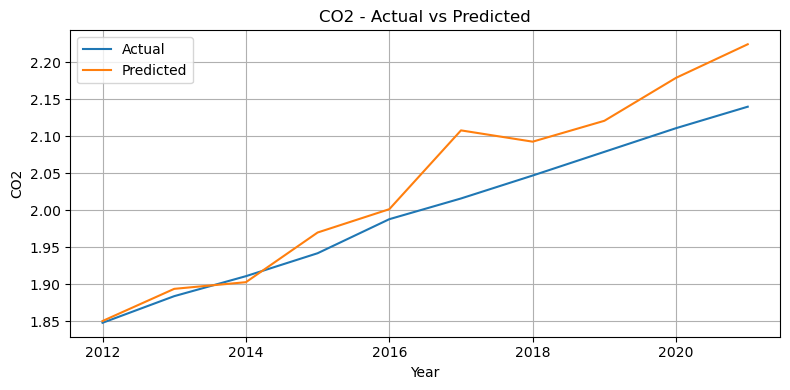

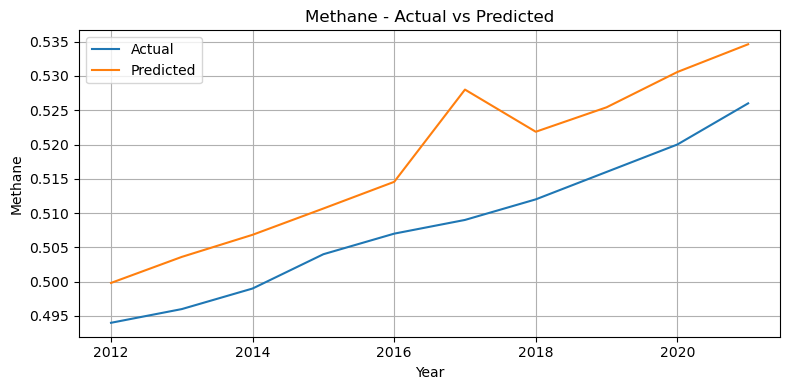

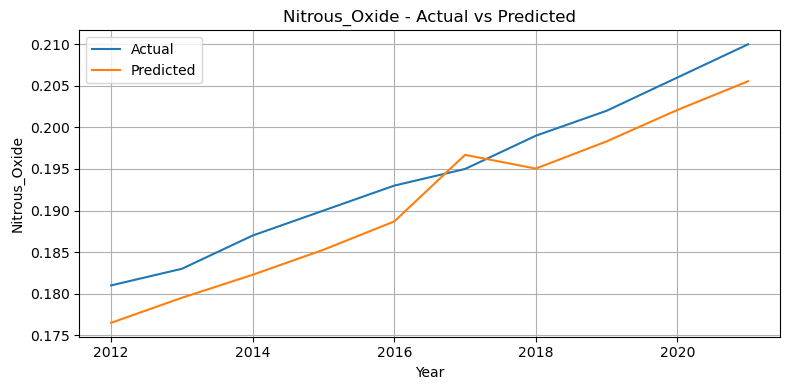

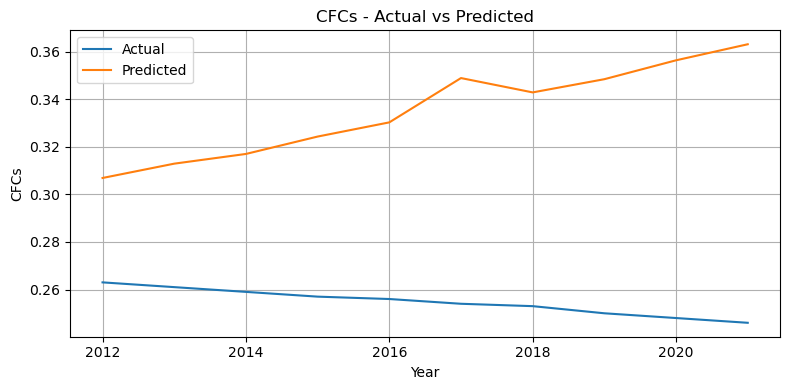

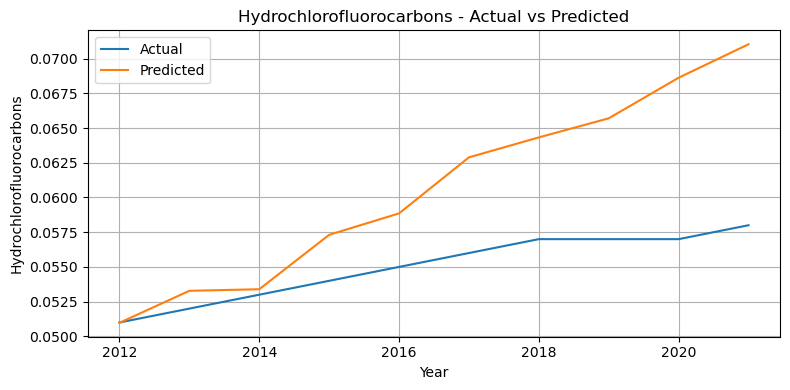

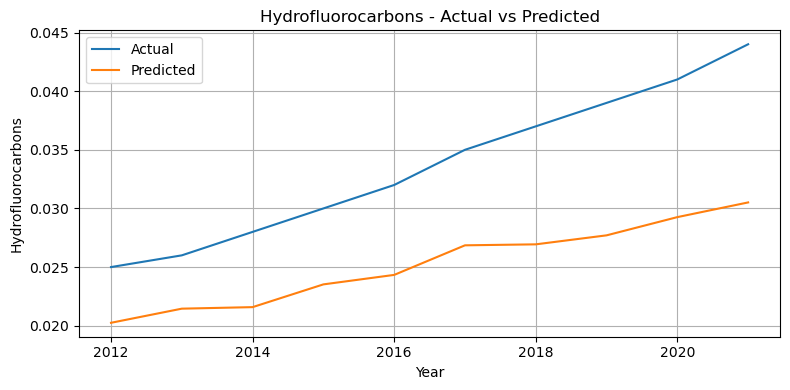

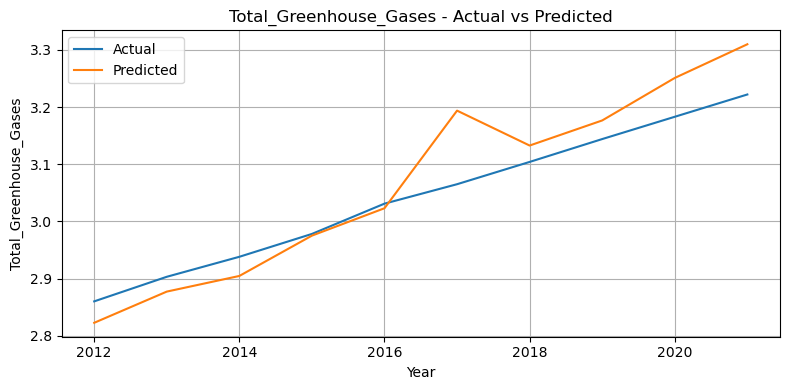

In [45]:
# 1. Build LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_train.shape[1]))  # Output layer with number of features
model.summary()

# 2. Compile the model
model.compile(optimizer='adam', loss='mse')

# 3. Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# 4. Predict on test data
y_pred_scaled = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred_scaled)
y_actual = scaler.inverse_transform(y_test)

# Create a grid comparing actual vs predicted for selected variables
comparison_data = {
    'Year': data[data['Year'] >= 2012]['Year'].values
}

# Add each variable's actual and predicted values to the grid
for var in variables_to_convert:
    idx = target_variables.index(var)
    comparison_data[f'Actual_{var}'] = y_actual[:, idx]
    comparison_data[f'Predicted_{var}'] = y_pred[:, idx]

result_grid = pd.DataFrame(comparison_data)

# Show the result
print(result_grid.head())


# Optional: Show first few rows
print(result_grid.head())

# Optional: Plot predictions vs actual for CO2
for var in variables_to_convert:
    plt.figure(figsize=(8, 4))
    plt.plot(result_grid['Year'], result_grid[f'Actual_{var}'], label='Actual')
    plt.plot(result_grid['Year'], result_grid[f'Predicted_{var}'], label='Predicted')
    plt.title(f'{var} - Actual vs Predicted')
    plt.xlabel('Year')
    plt.ylabel(var)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [46]:
print("\nModel trained with:")
print("LSTM units: 64")
print("Activation: relu")
print("Epochs: 100")
print("Batch size: 16")
print("Loss function: mse")
print("Optimizer: adam")



Model trained with:
LSTM units: 64
Activation: relu
Epochs: 100
Batch size: 16
Loss function: mse
Optimizer: adam


In [47]:
from tensorflow.keras.optimizers import Adam

# Training LSTM neural network model using TensorFlow's Keras API
LSTM_Model = Sequential()
LSTM_Model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_Model.add(Dense(64, activation='relu'))
LSTM_Model.add(Dense(32, activation='relu'))
LSTM_Model.add(Dense(16, activation='relu'))
LSTM_Model.add(Dense(len(target_variables), activation='linear'))  

# Compiling the model
LSTM_Model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[MeanAbsoluteError()])

history=LSTM_Model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=0)

C:\Users\Sumana Sarkar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
def create_lstm(model):
    return ModelNN(model, data, scaler, target_variables)

In [49]:
# Saving the model
LSTM_Model.save('C:/Users/Sumana Sarkar/OneDrive/Documents/Final year project/ClimateChangeData/Lstm.h5')

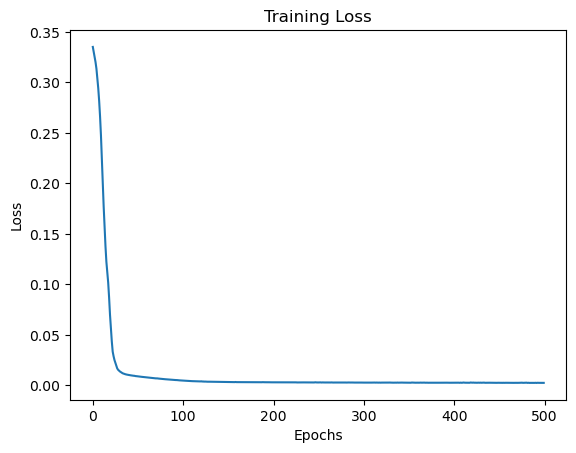

In [50]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [51]:
X_train.shape

(41, 1, 12)

# ANN model (Artificial neural network)

C:\Users\Sumana Sarkar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,308 (12.92 KB)

 Trainable params: 3,308 (12.92 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.1968 - val_loss: 0.4211
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1751 - val_loss: 0.3638
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1522 - val_loss: 0.3149
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1410 - val_loss: 0.2715
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1174 - val_loss: 0.2333
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1011 - val_loss: 0.1994
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0896 - val_loss: 0.1699
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0744 - val_loss: 0.1449
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0623 - val_loss: 0.1251
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0530 - val_loss: 0.1094
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0464 - val_loss: 0.0988
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0373 - val_l

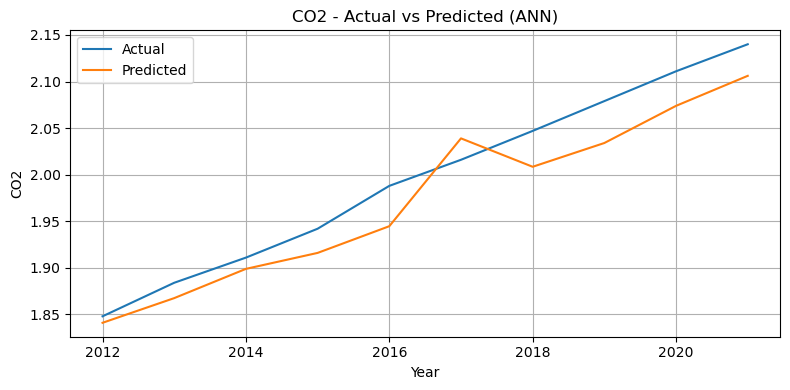

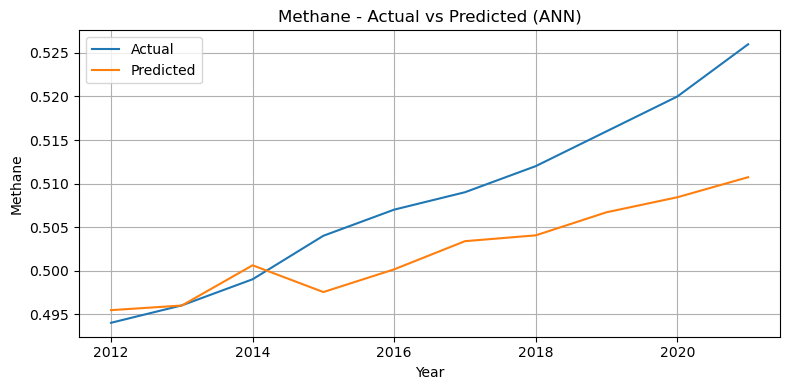

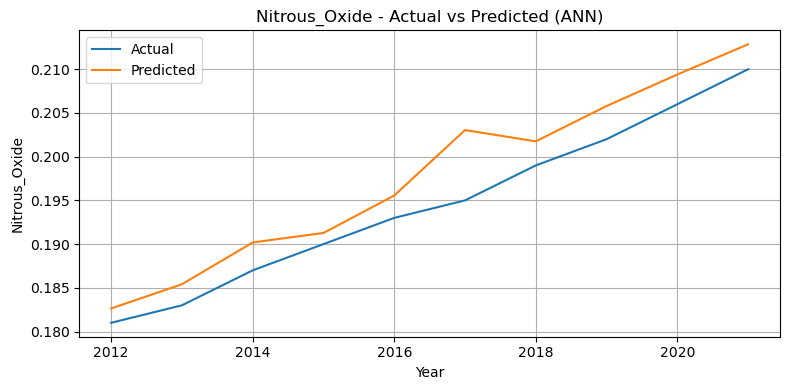

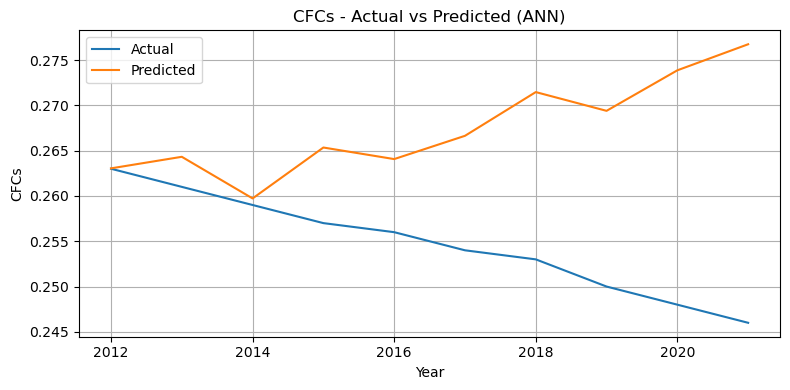

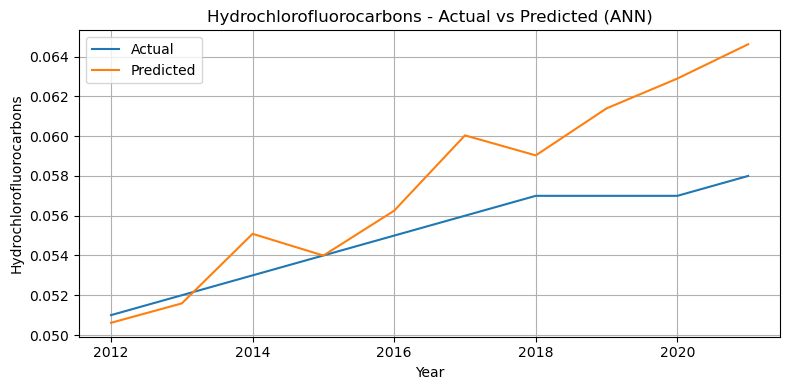

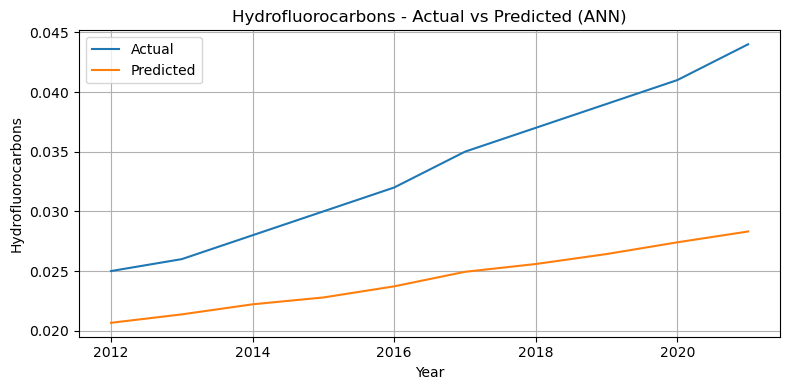

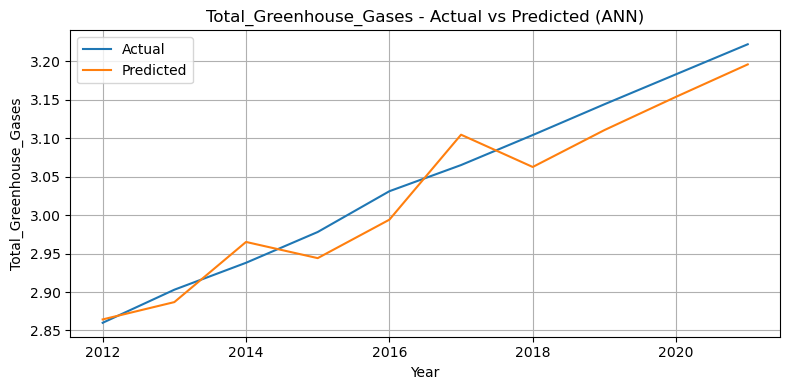

In [55]:
# Reshaping the data to be 2D (samples, features) for the ANN model
X_train_ann = X_train.reshape((X_train.shape[0], X_train.shape[2]))  # Remove the time-step dimension
X_test_ann = X_test.reshape((X_test.shape[0], X_test.shape[2]))  # Remove the time-step dimension

# 1. Build the ANN model
model_ann = Sequential()
model_ann.add(Dense(64, activation='relu', input_dim=X_train_ann.shape[1]))  # Input layer
model_ann.add(Dense(32, activation='relu'))  # Hidden layer
model_ann.add(Dense(y_train.shape[1]))  # Output layer with number of features
model_ann.summary()

# 2. Compile the model
model_ann.compile(optimizer='adam', loss='mse')

# 3. Train the model
history_ann = model_ann.fit(X_train_ann, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# 4. Predict on test data
y_pred_scaled_ann = model_ann.predict(X_test_ann)

# Inverse transform the predictions and actual values
y_pred_ann = scaler.inverse_transform(y_pred_scaled_ann)
y_actual_ann = scaler.inverse_transform(y_test)

# 5. Create a grid comparing actual vs predicted for selected variables
comparison_data_ann = {
    'Year': data[data['Year'] >= 2012]['Year'].values
}

for var in variables_to_convert:
    idx = target_variables.index(var)
    comparison_data_ann[f'Actual_{var}'] = y_actual_ann[:, idx]
    comparison_data_ann[f'Predicted_{var}'] = y_pred_ann[:, idx]

result_grid_ann = pd.DataFrame(comparison_data_ann)

# Show the result
print(result_grid_ann.head())

# 6. Plot predictions vs actual for each variable
for var in variables_to_convert:
    plt.figure(figsize=(8, 4))
    plt.plot(result_grid_ann['Year'], result_grid_ann[f'Actual_{var}'], label='Actual')
    plt.plot(result_grid_ann['Year'], result_grid_ann[f'Predicted_{var}'], label='Predicted')
    plt.title(f'{var} - Actual vs Predicted (ANN)')
    plt.xlabel('Year')
    plt.ylabel(var)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [56]:
# Build the ANN model
ANN_Model = Sequential()
ANN_Model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
ANN_Model.add(Dense(256, activation='relu'))
ANN_Model.add(Dense(128, activation='relu'))
ANN_Model.add(Dense(64, activation='relu'))
ANN_Model.add(Dense(32, activation='relu'))
ANN_Model.add(Dense(16, activation='relu'))
ANN_Model.add(Dense(X_train.shape[2], activation='linear')) 

# Compile the model
ANN_Model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[MeanAbsoluteError()])

# Train the model
history = ANN_Model.fit(X_train, y_train, epochs=300, batch_size=16, verbose=0)

C:\Users\Sumana Sarkar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
def create_ann(model):
    return ModelNN(model, data, scaler, target_variables)

In [58]:
ANN_Model.save('C:/Users/Sumana Sarkar/OneDrive/Documents/Final year project/ClimateChangeData/ann_model.keras')

# Polynomial Regression

In [59]:
def polynomial_regression(x_coordinates, y_coordinates, degree=2):
    # Fit a polynomial of the specified degree to the data
    coefficients = np.polyfit(x_coordinates, y_coordinates, degree)

    return coefficients

In [60]:
yValues = []
for index in range(1, len(df_list)):
    yValues.append(df_list[index][0])
yValues = np.array(yValues)  # Convert yValues to a numpy array
all_coeff = []

for index1 in range(1, len(df_list[0])):
    xValues = []
    prediction = 0
    #finds all of the known x-values
    for index2 in range(1, len(df_list)):
        xValues.append(df_list[index2][index1])
    xValues = np.array(xValues)  # Convert xValues to a numpy array
    line = polynomial_regression(yValues, xValues,3)
    all_coeff.append(line)

In [61]:
all_coeff

[array([ 1.85215302e-06, -1.09490659e-02,  2.15960370e+01, -1.42115151e+04]),
 array([ 3.88496716e-06, -2.33415611e-02,  4.67478326e+01, -3.12086795e+04]),
 array([ 5.10801986e-07, -3.04952851e-03,  6.07079513e+00, -4.02974232e+03]),
 array([ 6.67024830e-06, -4.02269321e-02,  8.08645134e+01, -5.41830022e+04]),
 array([-8.35103217e-07,  5.01319055e-03, -1.00299694e+01,  6.68803490e+03]),
 array([ 2.46806826e-07, -1.44790202e-03,  2.83082937e+00, -1.84449690e+03]),
 array([ 1.23892252e-05, -7.43592547e-02,  1.48797628e+02, -9.92695668e+04]),
 array([ 1.04599084e-03, -6.26718259e+00,  1.25194126e+04, -8.33758058e+06]),
 array([ 5.76672230e-06, -3.46111892e-02,  6.92585355e+01, -4.62049513e+04]),
 array([-7.13609620e-06,  4.41463324e-02, -9.09542393e+01,  6.24133969e+04]),
 array([ 1.85729482e-06, -1.09379100e-02,  2.14819536e+01, -1.40700955e+04]),
 array([ 2.13686232e-04, -1.26583069e+00,  2.50088122e+03, -1.64755940e+06])]

In [62]:
class PolyReg:
    def __init__(self, coeff: np.ndarray, degree: int = 3):
        self.coeff = coeff
        self.degree = degree

    def predict(self, year: int):
        all_predictions = []
        for c in range(12):
            prediction = 0
            coeff = self.coeff[c]
            for index2 in range(self.degree+1):
                prediction+=coeff[len(coeff)-index2-1]*float(year)**index2
            all_predictions.append(prediction)
        return all_predictions

In [63]:
def create_PolyReg(coeff: np.ndarray):
    return PolyReg(coeff)

#  ARIMA Model (autoregressive integrated moving average)

In [64]:
train_data = data_scaled[data['Year'] < 2012]
test_data = data_scaled[data['Year'] >= 2012]
train_df = pd.DataFrame(train_data, columns=target_variables)
train_df['Year'] = data.loc[data['Year'] < 2012]['Year']
train_df.index = train_df['Year']

In [65]:
def evaluate_arima_model(dataset, arima_order):
    train_size = 33
    train, test = dataset[0:train_size], dataset[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [66]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    #print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    return best_cfg

In [67]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
# CO2 - ARIMA(4, 1, 2)
# Methane - ARIMA(0, 2, 2)
# Nitrous_Oxide - ARIMA(6, 1, 2)
# CFCs - ARIMA(10, 1, 0)
for var_index in range(len(target_variables)):
    dataset_arima = data[target_variables[var_index]].values[:]
    warnings.filterwarnings("ignore")
    best_cfg = evaluate_models(dataset_arima, p_values, d_values, q_values)
    print("{} - {}".format(target_variables[var_index], best_cfg))

CO2 - (2, 2, 0)
Methane - (2, 2, 0)
Nitrous_Oxide - (4, 2, 0)
CFCs - (10, 0, 2)
Hydrochlorofluorocarbons - (1, 1, 0)
Hydrofluorocarbons - (0, 2, 2)
Total_Greenhouse_Gases - (2, 1, 2)
Total_Greenhouse_Gases_Scaled - (8, 0, 1)
1990_Equals_1 - (2, 2, 0)
Change - (8, 0, 1)
Surface_Temperature - (1, 2, 2)
CO2_Mean - (2, 2, 0)


In [68]:
class ModelARIMA:
    def __init__(self, data, start_year=1979, train_year=2012):
        self.data = data
        self.start_year = start_year
        self.train_year = train_year

    def predict(self, end_year):
        train_data = self.data.loc[self.data['Year']<self.train_year]
        predictions = []
        start = self.start_year - 1979 
        end = end_year - 1979
        arima_order_dict = {
            "CO2": (4, 1, 2),
            "Methane": (0, 2, 2),
            "Nitrous_Oxide": (6, 1, 2),
            "CFCs": (10, 1, 0),
            "Hydrochlorofluorocarbons": (1, 1, 1),
            "Hydrofluorocarbons":  (4, 2, 1),
            "Total_Greenhouse_Gases": (1, 1, 1), #(10, 0, 1),
            "Total_Greenhouse_Gases_Scaled": (1, 1, 1), #(4, 0, 1),
            "1990_Equals_1":  (1, 1, 1), #(6, 0, 1),
            "Change": (8, 0, 1),
            "Surface_Temperature": (1, 1, 0),
            "CO2_Mean": (1, 1, 1)
        }
        for target in target_variables:
            model = ARIMA(train_data[target], order=arima_order_dict[target])
            model_fit = model.fit()
            y_predict = model_fit.predict(strat=start, end=end)[end]
            predictions.append(y_predict)
        return predictions

In [69]:
def create_arima():
    return ModelARIMA(data)

# MLP Regressor (Multilayer perceptron)

In [70]:
model_regr = MLPRegressor(max_iter=500)

In [71]:
parameters = {
    'solver': ('lbfgs', 'adam'),
    'activation': ('logistic', 'tanh', 'relu'),
    'hidden_layer_sizes': ((5,2), (5,3), (5,5), (5,6), (5,8), (6,5), (7,5))
    }

grid = GridSearchCV(model_regr, param_grid=parameters,scoring='accuracy', cv=10)

In [72]:
grid_result = grid.fit(X_train.reshape(41, 12), y_train)

In [73]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: nan using {'activation': 'logistic', 'hidden_layer_sizes': (5, 2), 'solver': 'lbfgs'}
nan (nan) with: {'activation': 'logistic', 'hidden_layer_sizes': (5, 2), 'solver': 'lbfgs'}
nan (nan) with: {'activation': 'logistic', 'hidden_layer_sizes': (5, 2), 'solver': 'adam'}
nan (nan) with: {'activation': 'logistic', 'hidden_layer_sizes': (5, 3), 'solver': 'lbfgs'}
nan (nan) with: {'activation': 'logistic', 'hidden_layer_sizes': (5, 3), 'solver': 'adam'}
nan (nan) with: {'activation': 'logistic', 'hidden_layer_sizes': (5, 5), 'solver': 'lbfgs'}
nan (nan) with: {'activation': 'logistic', 'hidden_layer_sizes': (5, 5), 'solver': 'adam'}
nan (nan) with: {'activation': 'logistic', 'hidden_layer_sizes': (5, 6), 'solver': 'lbfgs'}
nan (nan) with: {'activation': 'logistic', 'hidden_layer_sizes': (5, 6), 'solver': 'adam'}
nan (nan) with: {'activation': 'logistic', 'hidden_layer_sizes': (5, 8), 'solver': 'lbfgs'}
nan (nan) with: {'activation': 'logistic', 'hidden_layer_sizes': (5, 8), 'solver': '

In [74]:
model_regr = MLPRegressor(random_state=1, max_iter=500, solver='lbfgs', activation='relu', hidden_layer_sizes=(5, 6)).fit(X_train.reshape(41, 12), y_train)

In [75]:
def create_mlp_regressor(model):
    return ModelNN(model, data, scaler, target_variables, is_tf_model=False)

# Plot Predictions

In [76]:
start_year = 2000
end_year = 2051
polynomial_regression_predictions = []
lstm_predictions = []
ann_predictions = []
arima_predictions = []
mlp_regressor_predictions = []

model_ann = create_ann(ANN_Model)
model_lstm = create_lstm(LSTM_Model)
model_polynomial_regression = create_PolyReg(all_coeff)
model_arima = create_arima()
model_mlp_regressor = create_mlp_regressor(model_regr)

for year in range(start_year, end_year):
    polynomial_regression_predictions.append(model_polynomial_regression.predict(year))
    lstm_predictions.append(model_lstm.predict(year))
    ann_predictions.append(model_ann.predict(year))
    arima_predictions.append(model_arima.predict(year))
    mlp_regressor_predictions.append(model_mlp_regressor.predict(year))

input_year 2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
input_year 2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
input_year 2000
input_year 2001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
input_year 2001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
input_year 2001
input_year 2002
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
input_year 2002
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
input_year 2002
input_year 2003
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
input_year 2003
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
input_year 2003
input_year 2004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
input_year 2004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
input_year 2004
input_year 2005
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
input_year 2005
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
input_year 2005
input_year 2006
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
input_year 2006
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
input_year 2006
input_year 2007
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
input_year 2007
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
input_year 2007
input_ye

In [77]:
df_polynomial_regression = pd.DataFrame(polynomial_regression_predictions, columns=target_variables)
df_lstm = pd.DataFrame(lstm_predictions, columns=target_variables)
df_ann = pd.DataFrame(ann_predictions, columns=target_variables)
df_arima = pd.DataFrame(arima_predictions, columns=target_variables)
df_mlp_regressor = pd.DataFrame(mlp_regressor_predictions, columns=target_variables)


df_polynomial_regression[variables_to_convert] = df_polynomial_regression[variables_to_convert].applymap(convert_watt_per_m2_to_joule_per_year)
df_lstm[variables_to_convert] = df_lstm[variables_to_convert].applymap(convert_watt_per_m2_to_joule_per_year)
df_ann[variables_to_convert] = df_ann[variables_to_convert].applymap(convert_watt_per_m2_to_joule_per_year)
df_arima[variables_to_convert] = df_arima[variables_to_convert].applymap(convert_watt_per_m2_to_joule_per_year)
df_mlp_regressor[variables_to_convert] = df_mlp_regressor[variables_to_convert].applymap(convert_watt_per_m2_to_joule_per_year)

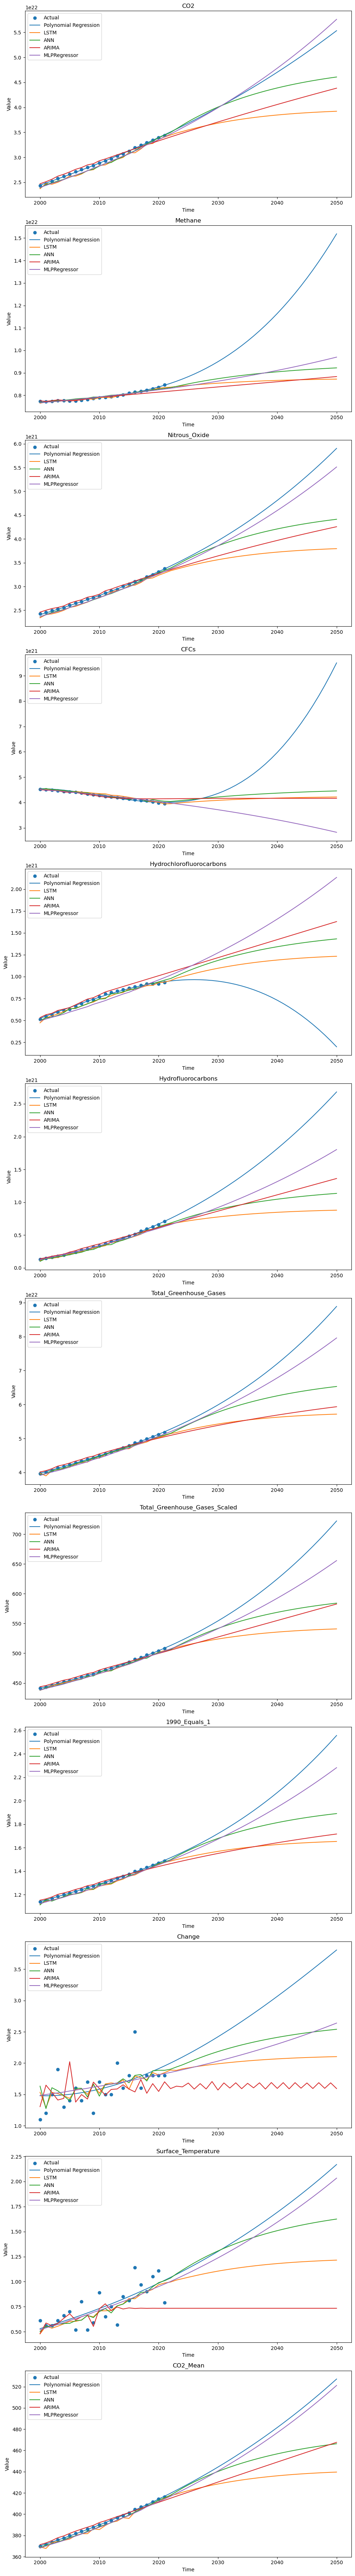

In [78]:
# Plot actual vs predicted for each target variable
fig, axes = plt.subplots(len(target_variables), 1, figsize=(10, 6 * len(target_variables)))
years = [year for year in range(start_year, end_year)]
data_to_print = data.loc[data['Year']>=start_year]
data_to_print[variables_to_convert] = data_to_print[variables_to_convert].applymap(convert_watt_per_m2_to_joule_per_year)
for i, target_variable in enumerate(target_variables):
    axes[i].scatter(data_to_print['Year'], data_to_print[target_variable], label='Actual', marker='o')
    axes[i].plot(years, df_polynomial_regression[target_variable], label='Polynomial Regression')
    axes[i].plot(years, df_lstm[target_variable], label='LSTM')
    axes[i].plot(years, df_ann[target_variable], label='ANN')
    axes[i].plot(years, df_arima[target_variable], label='ARIMA')
    axes[i].plot(years, df_mlp_regressor[target_variable], label='MLPRegressor')
    axes[i].set_title(target_variable)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Value')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Plotting LSTM vs ANN vs Actual for Each Variable

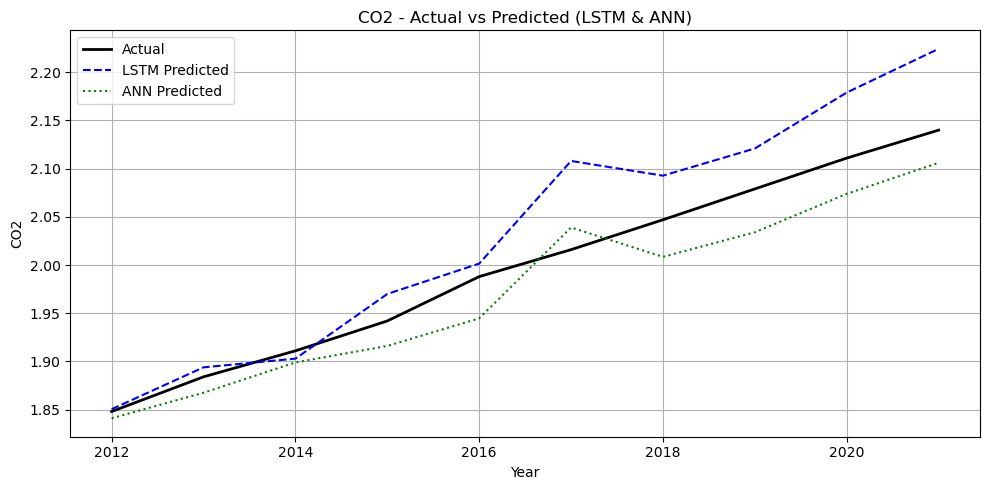

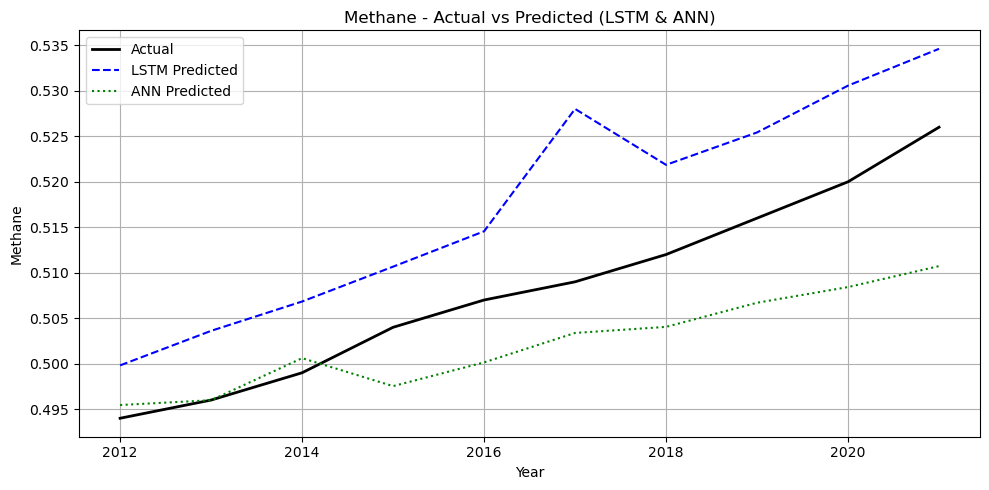

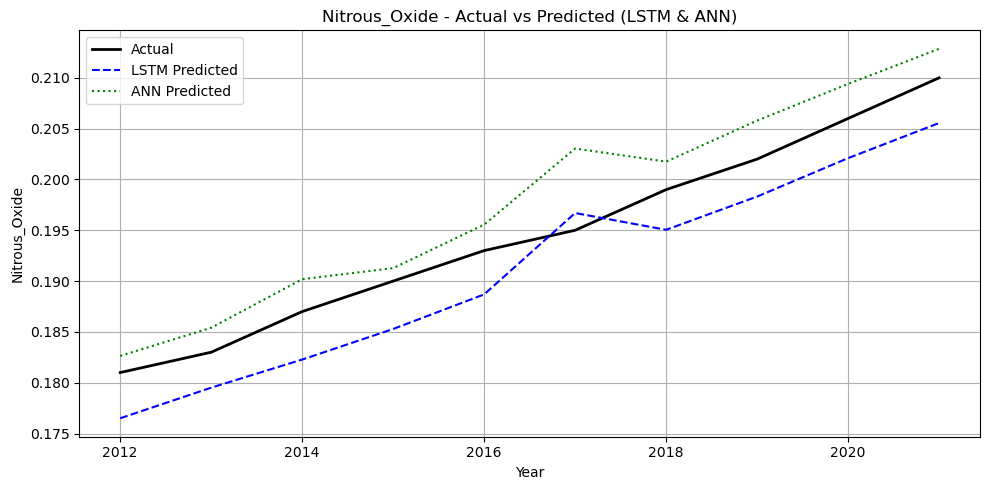

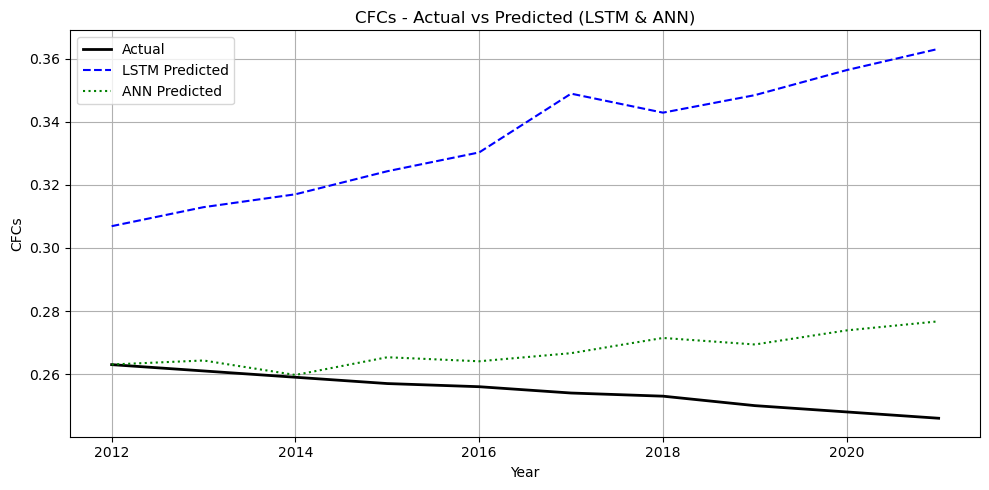

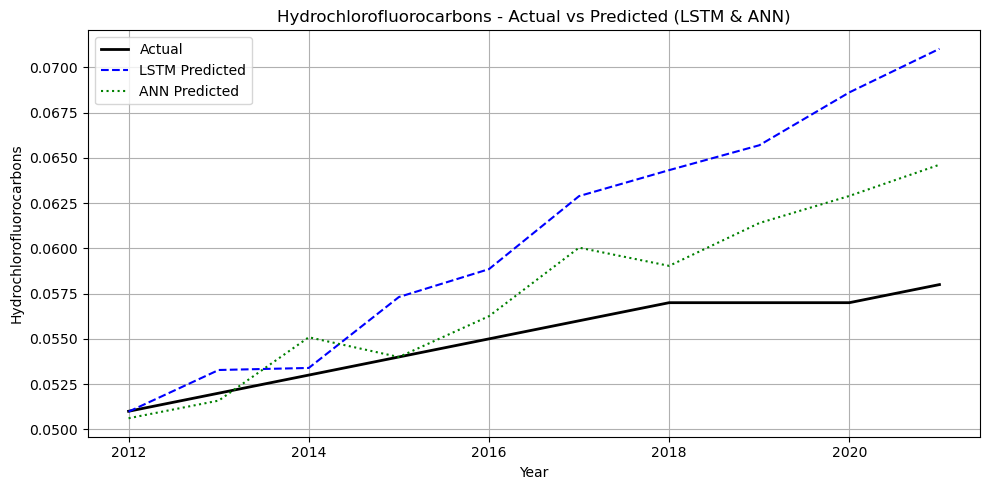

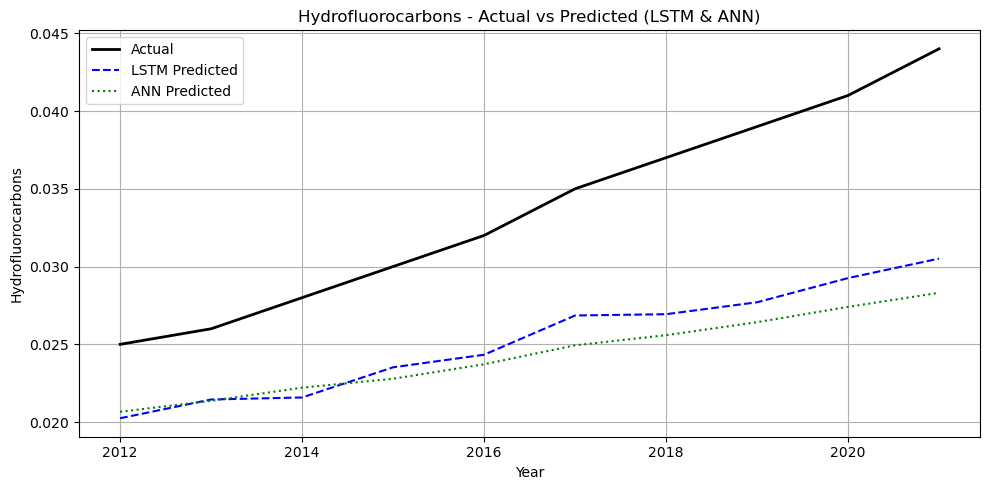

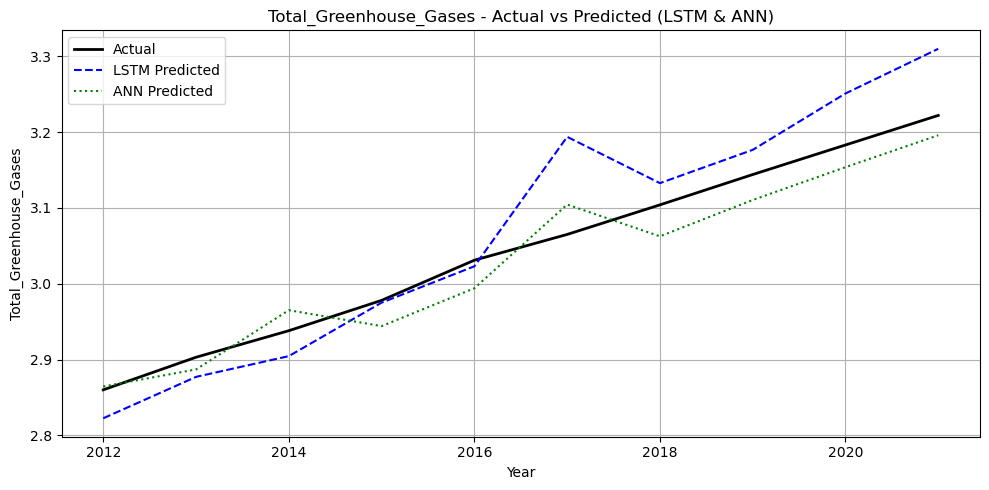

In [79]:
for var in variables_to_convert:
    plt.figure(figsize=(10, 5))
    plt.plot(result_grid['Year'], result_grid[f'Actual_{var}'], label='Actual', color='black', linewidth=2)
    plt.plot(result_grid['Year'], result_grid[f'Predicted_{var}'], label='LSTM Predicted', linestyle='--', color='blue')
    plt.plot(result_grid_ann['Year'], result_grid_ann[f'Predicted_{var}'], label='ANN Predicted', linestyle=':', color='green')
    
    plt.title(f'{var} - Actual vs Predicted (LSTM & ANN)')
    plt.xlabel('Year')
    plt.ylabel(var)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
